# Análise exploratória

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno
%matplotlib inline

# Set visualization style and figure size
#plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
# Load the datasets
initial_clean_df = pd.read_csv('sorted.csv', parse_dates=['tourney_date'])
print(f"Dataset shape: {initial_clean_df.shape}")
# Display the first few rows
print("\nFirst 5 rows:")
display(initial_clean_df.head())

Dataset shape: (2986, 53)

First 5 rows:


C:\Users\david\AppData\Local\Temp\ipykernel_9156\3101388900.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  initial_clean_df = pd.read_csv('sorted.csv', parse_dates=['tourney_date'])


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,surface_Clay,surface_Grass,surface_Hard,week
0,2023-0891,Pune,Hard,32,A,1672617600000,271,207925,NaN,Q,...,5.0,10.0,171,335,340,146,0,0,1,1
1,2023-0891,Pune,Hard,32,A,1672617600000,272,109739,NaN,Q,...,2.0,6.0,159,354,127,444,0,0,1,1
2,2023-0891,Pune,Hard,32,A,1672617600000,273,111513,NaN,NaN,...,2.0,5.0,70,738,50,895,0,0,1,1
3,2023-0891,Pune,Hard,32,A,1672617600000,275,126127,NaN,NaN,...,1.0,5.0,60,781,115,490,0,0,1,1
4,2023-0891,Pune,Hard,32,A,1672617600000,276,111581,NaN,NaN,...,6.0,10.0,113,507,2050,1,0,0,1,1


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
initial_clean_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          1417 non-null   object        
 1   tourney_name        1417 non-null   object        
 2   surface             1417 non-null   object        
 3   draw_size           1417 non-null   int64         
 4   tourney_level       1417 non-null   object        
 5   tourney_date        1417 non-null   datetime64[ns]
 6   match_num           1417 non-null   int64         
 7   winner_id           1417 non-null   int64         
 8   winner_seed         618 non-null    object        
 9   winner_entry        200 non-null    object        
 10  winner_name         1417 non-null   object        
 11  winner_hand         1417 non-null   object        
 12  winner_ht           1417 non-null   float64       
 13  winner_ioc          1417 non-null 

In [23]:
date_filtered_df = initial_clean_df[initial_clean_df['tourney_date'] >= '2011-01-01']
print(len(date_filtered_df))
null_surface = date_filtered_df[date_filtered_df['surface_elo_diff']>0]
len(null_surface)/len(date_filtered_df) * 100
#initial_clean_df.loser_elo.max()

37882


61.707407211868436

In [6]:
initial_clean_df.surface.unique()

array(['Grass', 'Clay', 'Carpet', 'Hard'], dtype=object)

In [4]:
initial_clean_df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
draw_size,192502.0,53.184497,2.0,32.0,32.0,64.0,128.0,36.755651
tourney_date,193337,1994-04-29 07:21:28.396944128,1967-12-28 00:00:00,1980-06-09 00:00:00,1993-07-26 00:00:00,2007-07-09 00:00:00,2024-05-20 00:00:00,NaN
match_num,193337.0,80.579191,1.0,11.0,26.0,100.0,1701.0,112.614086
winner_id,193337.0,104863.644414,100001.0,100428.0,101736.0,104026.0,212721.0,14758.641896
winner_ht,176236.0,184.512636,160.0,180.0,185.0,188.0,211.0,6.673546
winner_age,192026.0,25.675078,14.3,22.7,25.3,28.2,58.7,4.054686
loser_id,193337.0,106029.47141,100001.0,100529.0,101926.0,104417.0,212722.0,17484.75218
loser_ht,163431.0,184.279941,160.0,180.0,185.0,188.0,211.0,6.658337
loser_age,188680.0,25.729239,14.2,22.7,25.4,28.4,63.6,4.201515
best_of,193337.0,3.435861,1.0,3.0,3.0,3.0,5.0,0.826583


In [9]:
cond = initial_clean_df['minutes'].isnull() # Check the average height of winners
initial_clean_df[cond][['minutes','tourney_name','winner_name','loser_name']]

,minutes,tourney_name,winner_name,loser_name
60,NaN,United Cup,Arthur Rinderknech,Francisco Cerundolo
67,NaN,United Cup,Lorenzo Musetti,Felipe Meligeni Alves
70,NaN,United Cup,Cameron Norrie,Alex De Minaur
78,NaN,United Cup,Taylor Fritz,Jiri Lehecka
81,NaN,United Cup,Marc Andrea Huesler,Timofey Skatov
...,...,...,...,...
2946,NaN,Davis Cup Finals SF: FIN vs AUS,Alex De Minaur,Emil Ruusuvuori
2947,NaN,Davis Cup Finals SF: ITA vs SRB,Miomir Kecmanovic,Lorenzo Musetti
2948,NaN,Davis Cup Finals SF: ITA vs SRB,Jannik Sinner,Novak Djokovic
2949,NaN,Davis Cup Finals F: AUS vs ITA,Matteo Arnaldi,Alexei Popyrin


Columns with missing values:


,Missing Values,Percentage
winner_entry,1217,85.885674
loser_entry,1114,78.616796
loser_seed,1040,73.394495
winner_seed,799,56.386733
w_ace,9,0.635145
w_df,9,0.635145
w_svpt,9,0.635145
l_df,9,0.635145
w_1stIn,9,0.635145
w_1stWon,9,0.635145


<Figure size 1400x800 with 0 Axes>

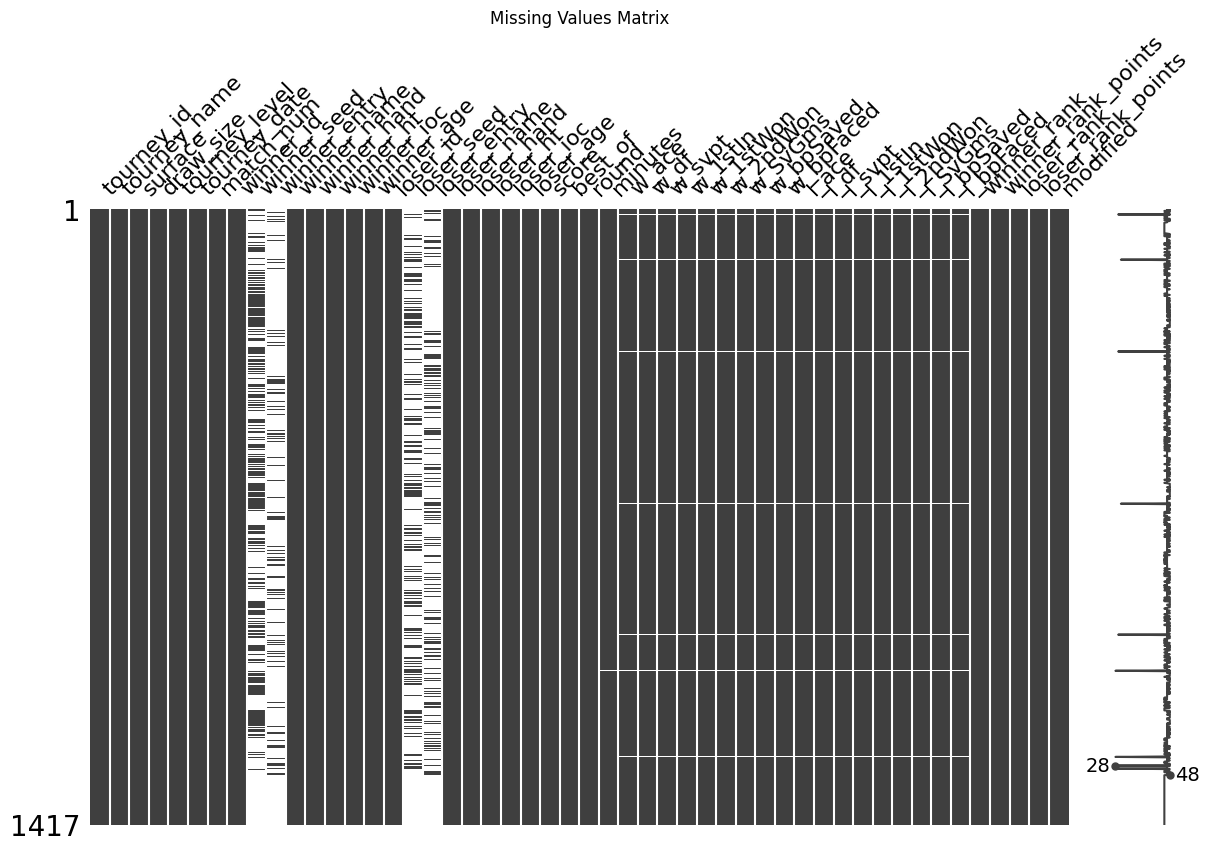

<Figure size 1400x800 with 0 Axes>

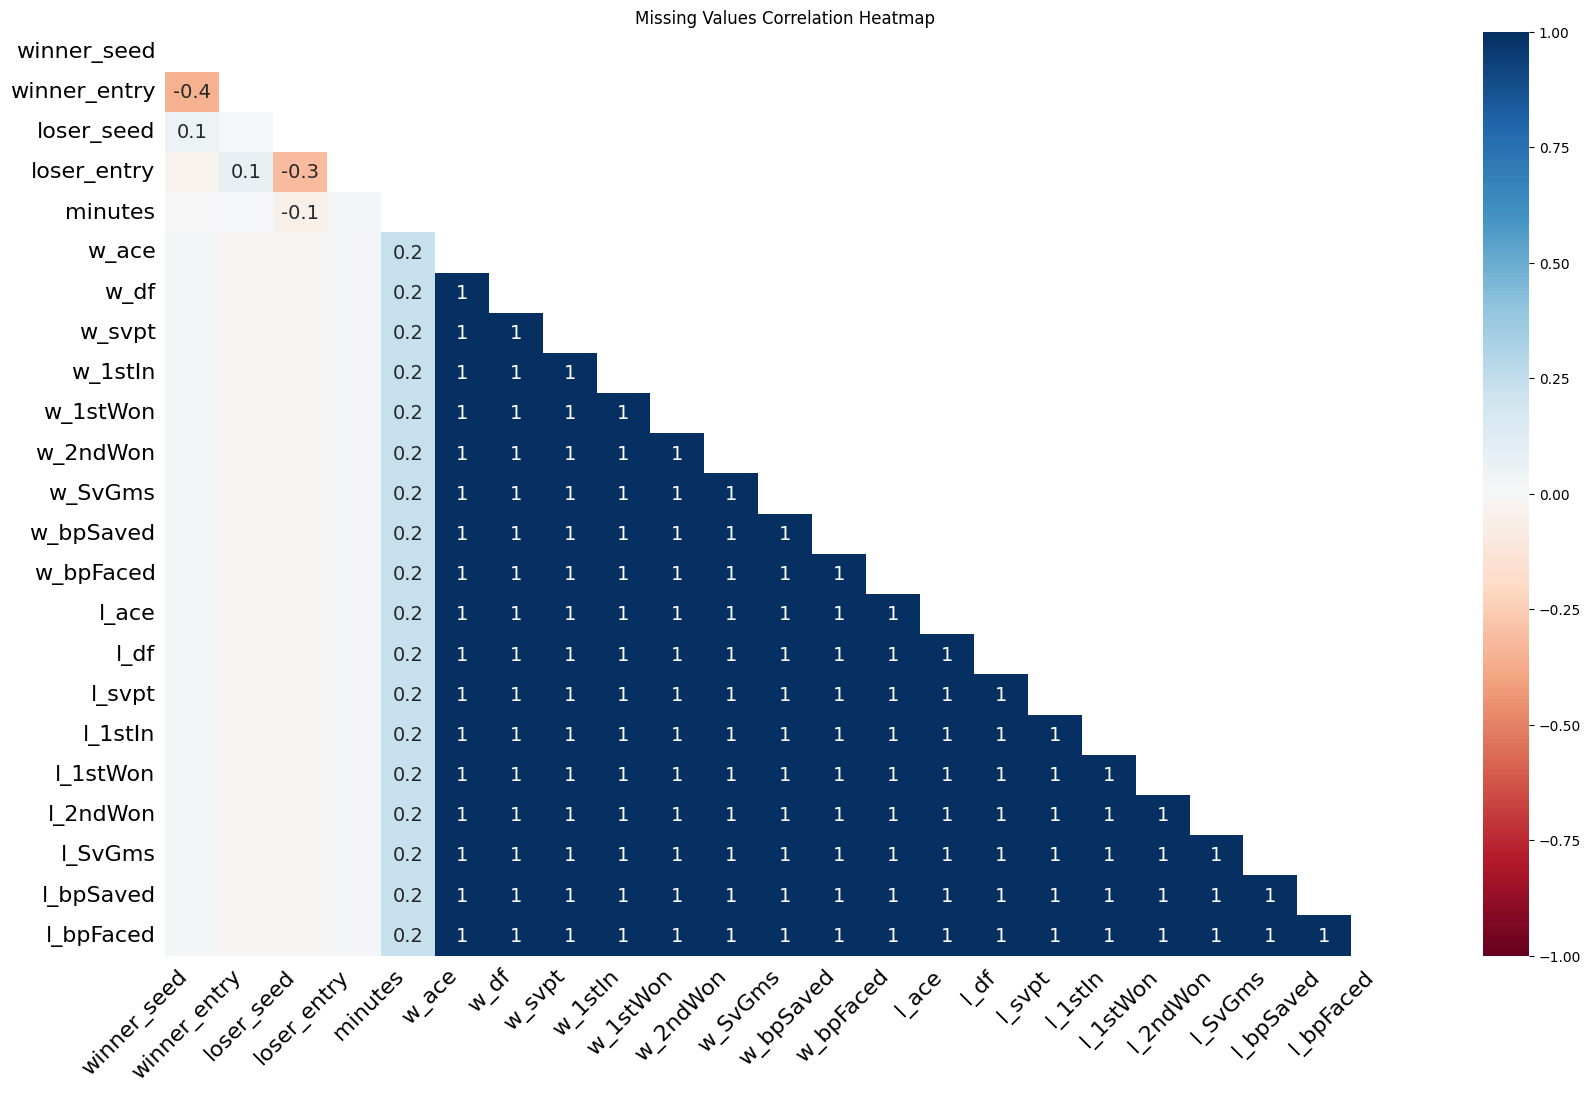

In [5]:
# Checking for missing values
missing_values = initial_clean_df.isnull().sum()
missing_percent = (missing_values / len(initial_clean_df)) * 100

# Display columns with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
print("Columns with missing values:")
display(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Visualize missing values
plt.figure(figsize=(14, 8))
msno.matrix(initial_clean_df, figsize=(14, 8))
plt.title('Missing Values Matrix')
plt.show()

# Missing values heatmap
plt.figure(figsize=(14, 8))
msno.heatmap(initial_clean_df)
plt.title('Missing Values Correlation Heatmap')
plt.show()

In [16]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
display(initial_clean_df.describe().T)

# Check unique values for categorical columns (selecting a few important ones)
categorical_cols = ['surface', 'tourney_level', 'winner_hand', 'loser_hand', 'winner_ioc', 'loser_ioc']
for col in categorical_cols:
    if col in initial_clean_df.columns:
        print(f"\nUnique values in {col}:")
        display(initial_clean_df[col].value_counts())

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
draw_size,2966.0,64.938638,46.386204,2.0,32.00,32.000000,128.00,128.0
match_num,2966.0,235.673635,82.390724,1.0,208.00,275.000000,288.00,300.0
winner_id,2966.0,144891.065408,42716.836377,100644.0,106331.00,126205.000000,200325.00,212051.0
winner_ht,2966.0,187.442635,6.086107,170.0,183.00,187.442635,191.00,206.0
winner_age,2966.0,26.598718,4.335230,17.9,23.90,26.100000,28.40,43.6
loser_id,2966.0,144029.425152,42450.205652,100644.0,106234.00,126205.000000,200323.25,212044.0
loser_ht,2966.0,186.542759,6.083537,170.0,183.00,186.542759,191.00,206.0
loser_age,2966.0,26.861609,4.365289,16.5,24.10,26.500000,29.40,43.0
best_of,2966.0,3.351989,0.761760,3.0,3.00,3.000000,3.00,5.0
minutes,2740.0,119.856934,43.649898,5.0,87.00,113.000000,147.00,345.0



Unique values in surface:


surface
Hard     1691
Clay      895
Grass     327
hard       53
Name: count, dtype: int64


Unique values in tourney_level:


tourney_level
A    1537
M     688
G     507
D     219
F      15
Name: count, dtype: int64


Unique values in winner_hand:


winner_hand
R    2555
L     342
U      69
Name: count, dtype: int64


Unique values in loser_hand:


loser_hand
R    2436
L     398
U     132
Name: count, dtype: int64


Unique values in winner_ioc:


winner_ioc
USA    364
FRA    246
RUS    219
ITA    194
ESP    188
      ... 
THA      1
JAM      1
MON      1
MAR      1
URU      1
Name: count, Length: 71, dtype: int64


Unique values in loser_ioc:


loser_ioc
USA    340
FRA    300
AUS    194
ESP    193
ARG    187
      ... 
LUX      2
LBN      1
URU      1
ZIM      1
TUR      1
Name: count, Length: 75, dtype: int64

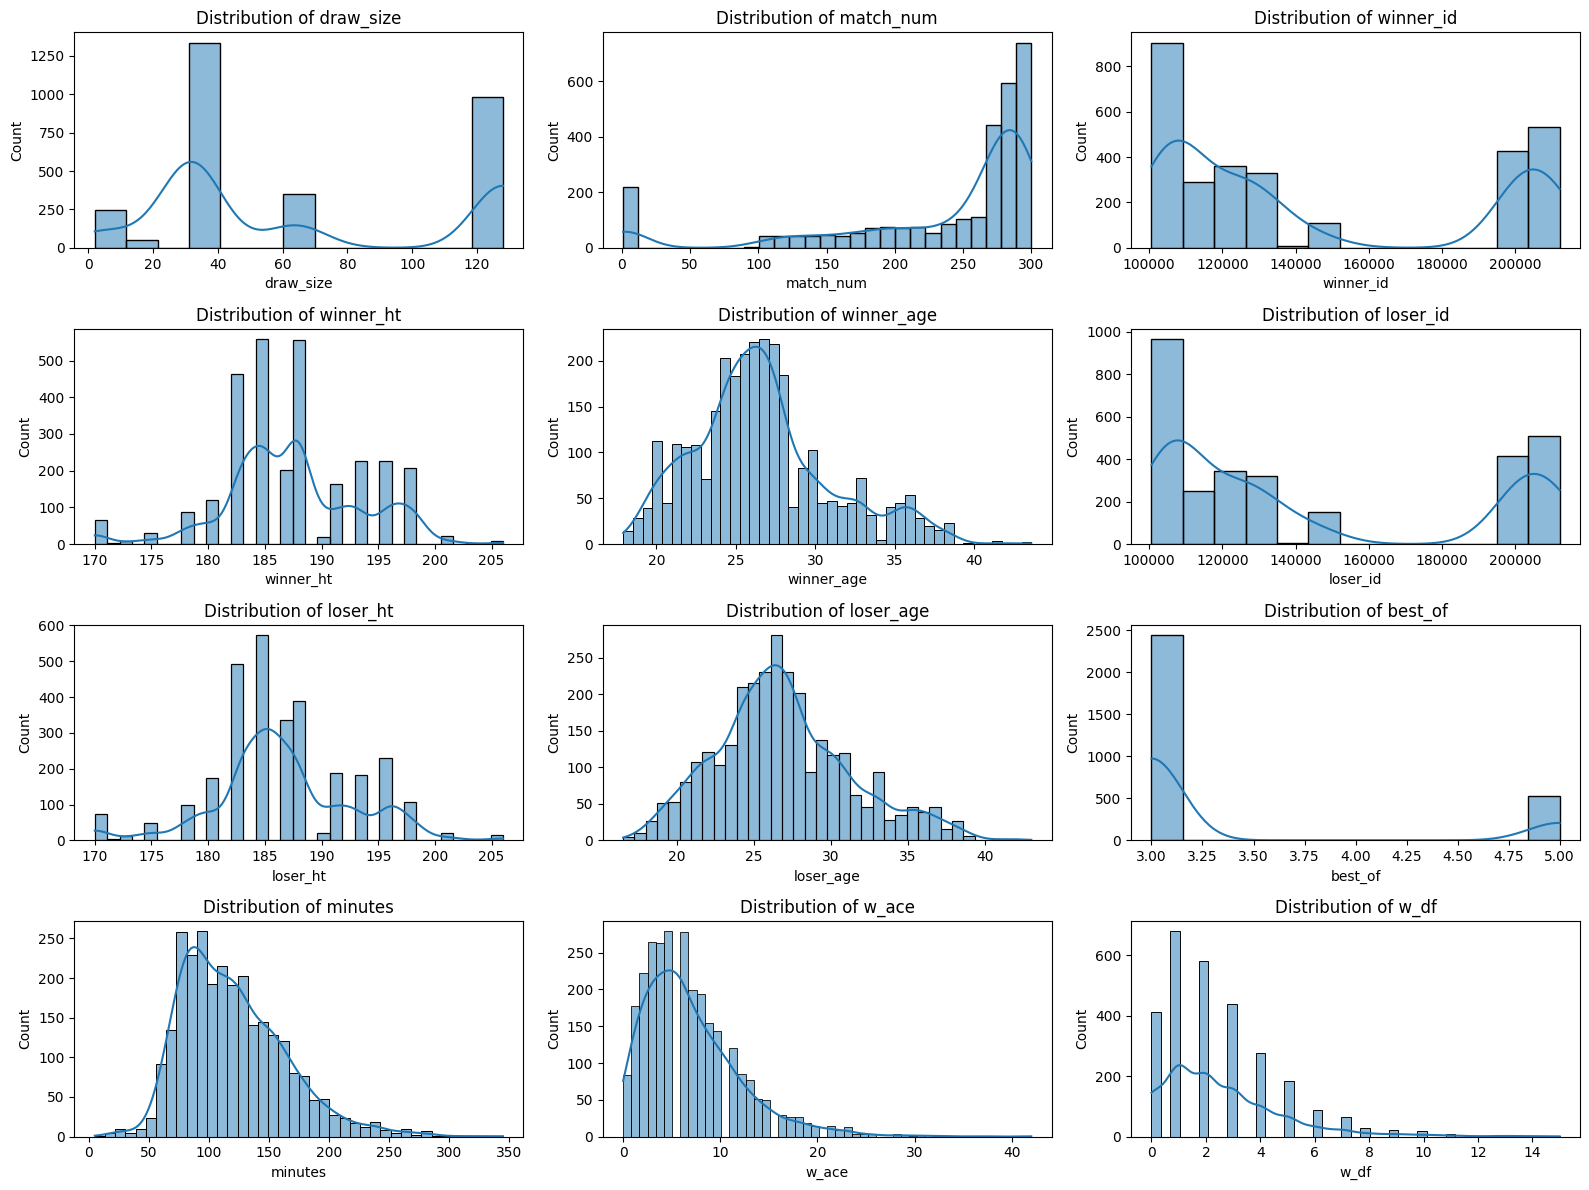

In [17]:
# Analyzing distributions of numerical variables
numeric_cols = initial_clean_df.select_dtypes(include=['int64', 'float64']).columns

# Creating histograms for key numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:12]):  # Limit to first 12 numerical columns
    plt.subplot(4, 3, i+1)
    sns.histplot(initial_clean_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

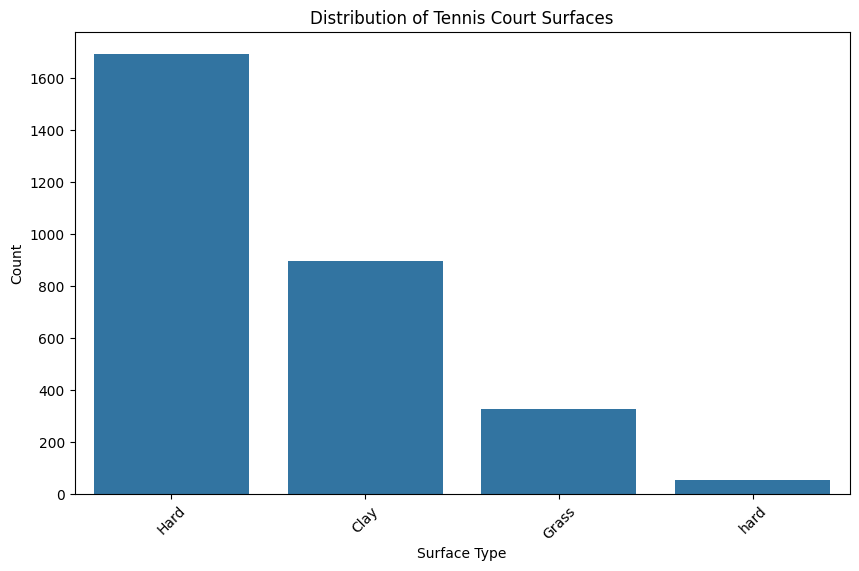

In [18]:
# Analyzing tennis surfaces distribution
if 'surface' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    surface_counts = initial_clean_df['surface'].value_counts()
    sns.barplot(x=surface_counts.index, y=surface_counts.values)
    plt.title('Distribution of Tennis Court Surfaces')
    plt.xlabel('Surface Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

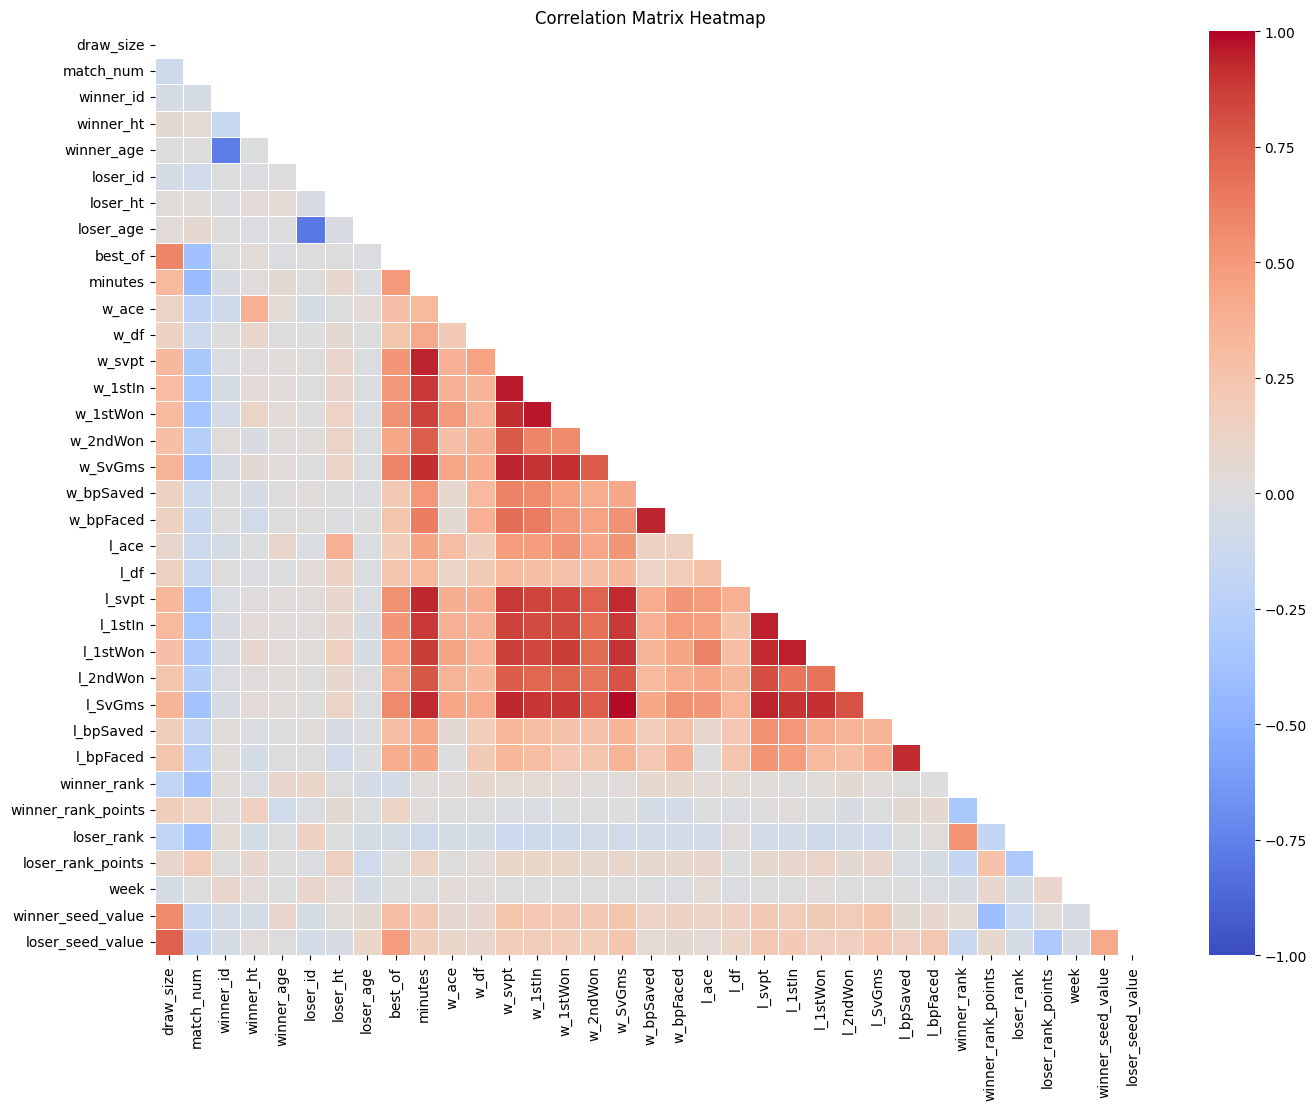

Top correlations:
w_SvGms - l_SvGms: 0.9846
w_1stIn - w_1stWon: 0.9622
w_svpt - w_1stIn: 0.9535
l_1stIn - l_1stWon: 0.9523
l_svpt - l_1stIn: 0.9522
w_svpt - w_SvGms: 0.9427
w_bpSaved - w_bpFaced: 0.9419
l_svpt - l_SvGms: 0.9395
minutes - w_svpt: 0.9386
w_svpt - l_SvGms: 0.9345
minutes - l_svpt: 0.9316
l_bpSaved - l_bpFaced: 0.9263
l_svpt - l_1stWon: 0.9262
w_SvGms - l_svpt: 0.9259
minutes - l_SvGms: 0.9234
minutes - w_SvGms: 0.9192
w_svpt - w_1stWon: 0.9189
w_1stWon - w_SvGms: 0.9104
l_1stWon - l_SvGms: 0.9099
w_1stIn - w_SvGms: 0.9043


In [19]:
# Correlation analysis
# Select only numerical columns for correlation
numeric_df = initial_clean_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display top correlations
def get_top_correlations(corr_matrix, n=20):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                              corr_matrix.iloc[i, j]))
    
    return sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:n]

top_corrs = get_top_correlations(corr_matrix)
print("Top correlations:")
for var1, var2, corr in top_corrs:
    print(f"{var1} - {var2}: {corr:.4f}")

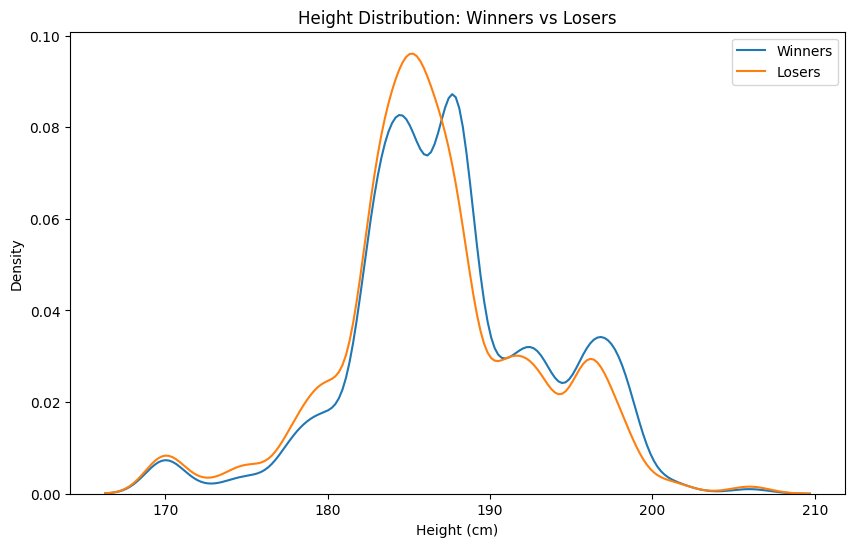

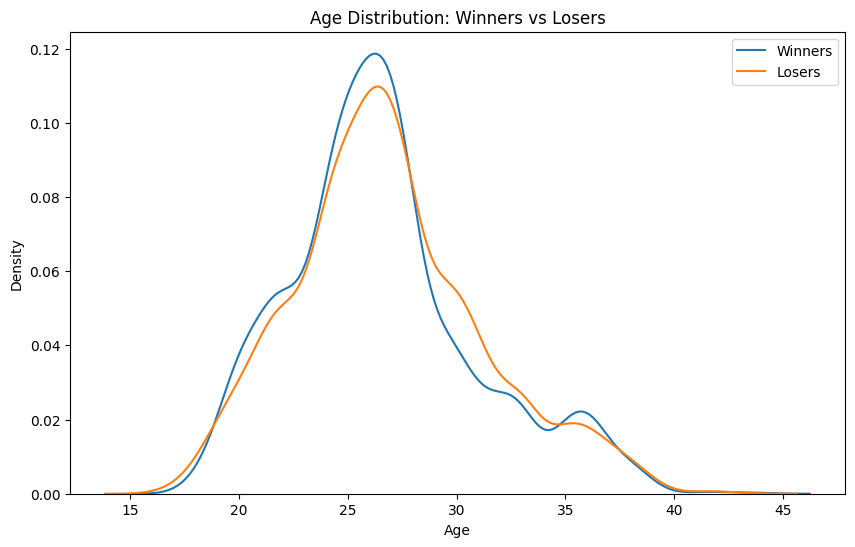

In [20]:
# Analysis of winners vs losers statistics
# Check for columns that may contain winner and loser statistics
winner_cols = [col for col in initial_clean_df.columns if col.startswith('winner_')]
loser_cols = [col for col in initial_clean_df.columns if col.startswith('loser_')]

# Compare heights of winners and losers
if 'winner_ht' in initial_clean_df.columns and 'loser_ht' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(initial_clean_df['winner_ht'].dropna(), label='Winners')
    sns.kdeplot(initial_clean_df['loser_ht'].dropna(), label='Losers')
    plt.title('Height Distribution: Winners vs Losers')
    plt.xlabel('Height (cm)')
    plt.legend()
    plt.show()

# Compare ages of winners and losers
if 'winner_age' in initial_clean_df.columns and 'loser_age' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(initial_clean_df['winner_age'].dropna(), label='Winners')
    sns.kdeplot(initial_clean_df['loser_age'].dropna(), label='Losers')
    plt.title('Age Distribution: Winners vs Losers')
    plt.xlabel('Age')
    plt.legend()
    plt.show()

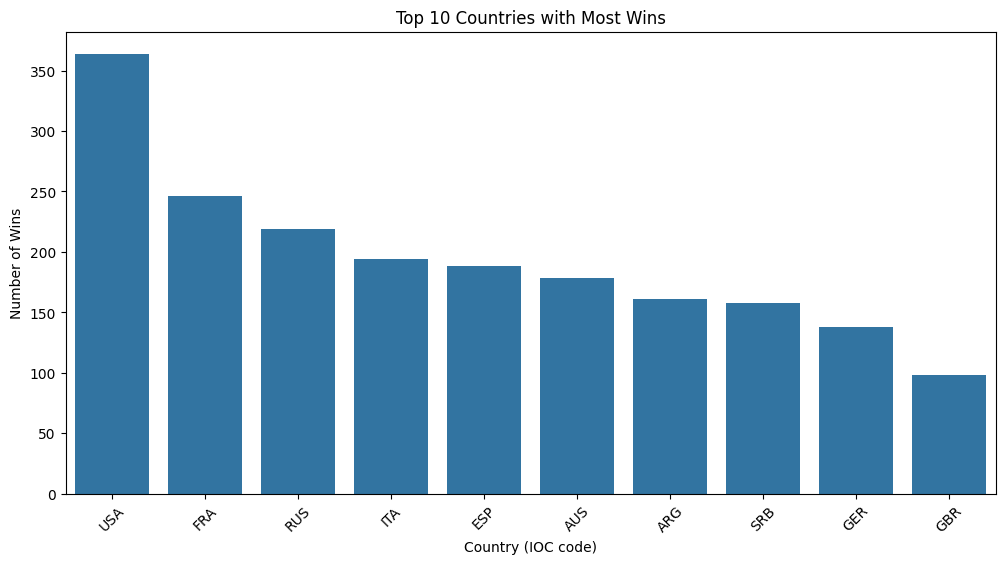

In [21]:
# Analysis by country (IOC code)
if 'winner_ioc' in initial_clean_df.columns:
    top_countries = initial_clean_df['winner_ioc'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_countries.index, y=top_countries.values)
    plt.title('Top 10 Countries with Most Wins')
    plt.xlabel('Country (IOC code)')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.show()

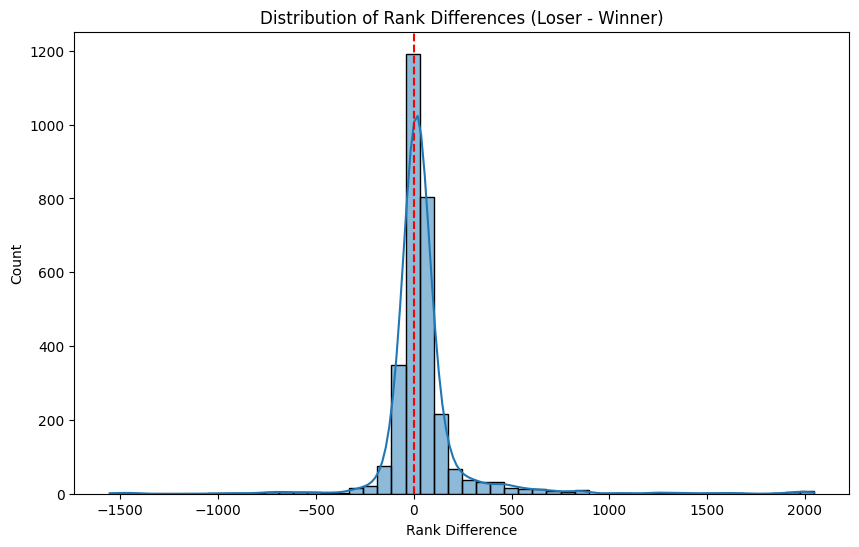

Higher ranked player win rate: 0.6371
Lower ranked player win rate: 0.3629


In [22]:
# Win probability analysis based on rankings (if available)
if 'winner_rank' in initial_clean_df.columns and 'loser_rank' in initial_clean_df.columns:
    initial_clean_df['rank_diff'] = initial_clean_df['loser_rank'] - initial_clean_df['winner_rank']
    
    plt.figure(figsize=(10, 6))
    sns.histplot(initial_clean_df['rank_diff'].dropna(), bins=50, kde=True)
    plt.title('Distribution of Rank Differences (Loser - Winner)')
    plt.xlabel('Rank Difference')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.show()
    
    # Calculate win rate when higher ranked (negative rank_diff means winner had worse rank)
    higher_ranked_wins = (initial_clean_df['rank_diff'] > 0).sum()
    lower_ranked_wins = (initial_clean_df['rank_diff'] < 0).sum()
    
    print(f"Higher ranked player win rate: {higher_ranked_wins/(higher_ranked_wins+lower_ranked_wins):.4f}")
    print(f"Lower ranked player win rate: {lower_ranked_wins/(higher_ranked_wins+lower_ranked_wins):.4f}")

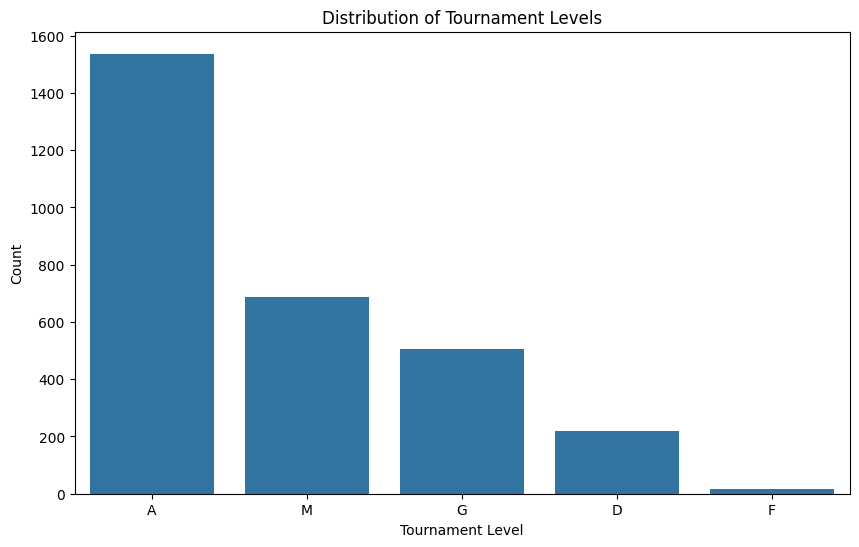

Tournament Levels:
G = Grand Slam
M = Masters 1000
A = ATP Tour 500 and 250 level events
C = Challenger events
S = Satellite events
F = ITF Futures events


In [23]:
# Analysis by tournament level
if 'tourney_level' in initial_clean_df.columns:
    plt.figure(figsize=(10, 6))
    level_counts = initial_clean_df['tourney_level'].value_counts()
    sns.barplot(x=level_counts.index, y=level_counts.values)
    plt.title('Distribution of Tournament Levels')
    plt.xlabel('Tournament Level')
    plt.ylabel('Count')
    plt.show()
    
    # Explanation of tournament levels
    print("Tournament Levels:")
    print("G = Grand Slam")
    print("M = Masters 1000")
    print("A = ATP Tour 500 and 250 level events")
    print("C = Challenger events")
    print("S = Satellite events")
    print("F = ITF Futures events")

In [24]:
# Time series analysis (if date information is available)
if 'tourney_date' in initial_clean_df.columns:
    # Convert date format (YYYYMMDD) to datetime
    initial_clean_df['date'] = pd.to_datetime(initial_clean_df['tourney_date'], format='%Y%m%d')
    
    # Extract year
    initial_clean_df['year'] = initial_clean_df['date'].dt.year
    
    # Plot matches per year
    plt.figure(figsize=(14, 6))
    year_counts = initial_clean_df['year'].value_counts().sort_index()
    sns.lineplot(x=year_counts.index, y=year_counts.values)
    plt.title('Number of Matches per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45)
    plt.show()

ValueError: time data "2023-01-02" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

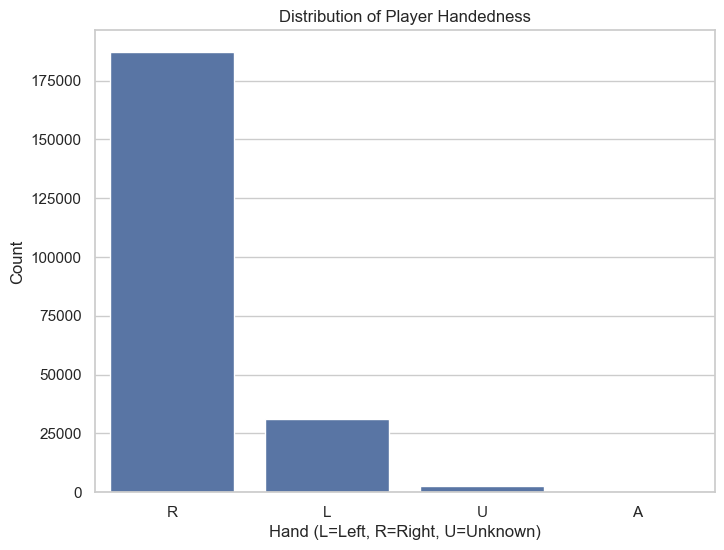

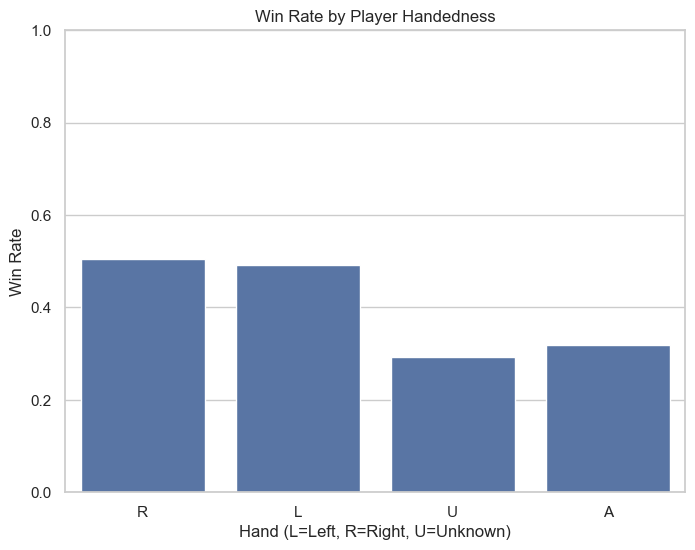

In [ ]:
# Analysis of player handedness
if 'winner_hand' in initial_clean_df.columns and 'loser_hand' in initial_clean_df.columns:
    # Combined hand distribution
    all_hands = pd.concat([
        initial_clean_df['winner_hand'].rename('hand'),
        initial_clean_df['loser_hand'].rename('hand')
    ])
    
    plt.figure(figsize=(8, 6))
    hand_counts = all_hands.value_counts()
    sns.barplot(x=hand_counts.index, y=hand_counts.values)
    plt.title('Distribution of Player Handedness')
    plt.xlabel('Hand (L=Left, R=Right, U=Unknown)')
    plt.ylabel('Count')
    plt.show()
    
    # Win rate by handedness
    hand_wins = initial_clean_df['winner_hand'].value_counts()
    hand_losses = initial_clean_df['loser_hand'].value_counts()
    
    # Create dataframe for win percentage
    hand_stats = pd.DataFrame({
        'wins': hand_wins,
        'losses': hand_losses
    }).fillna(0)
    
    hand_stats['total'] = hand_stats['wins'] + hand_stats['losses']
    hand_stats['win_rate'] = hand_stats['wins'] / hand_stats['total']
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=hand_stats.index, y=hand_stats['win_rate'])
    plt.title('Win Rate by Player Handedness')
    plt.xlabel('Hand (L=Left, R=Right, U=Unknown)')
    plt.ylabel('Win Rate')
    plt.ylim(0, 1)
    plt.show()

<Figure size 1200x1000 with 0 Axes>

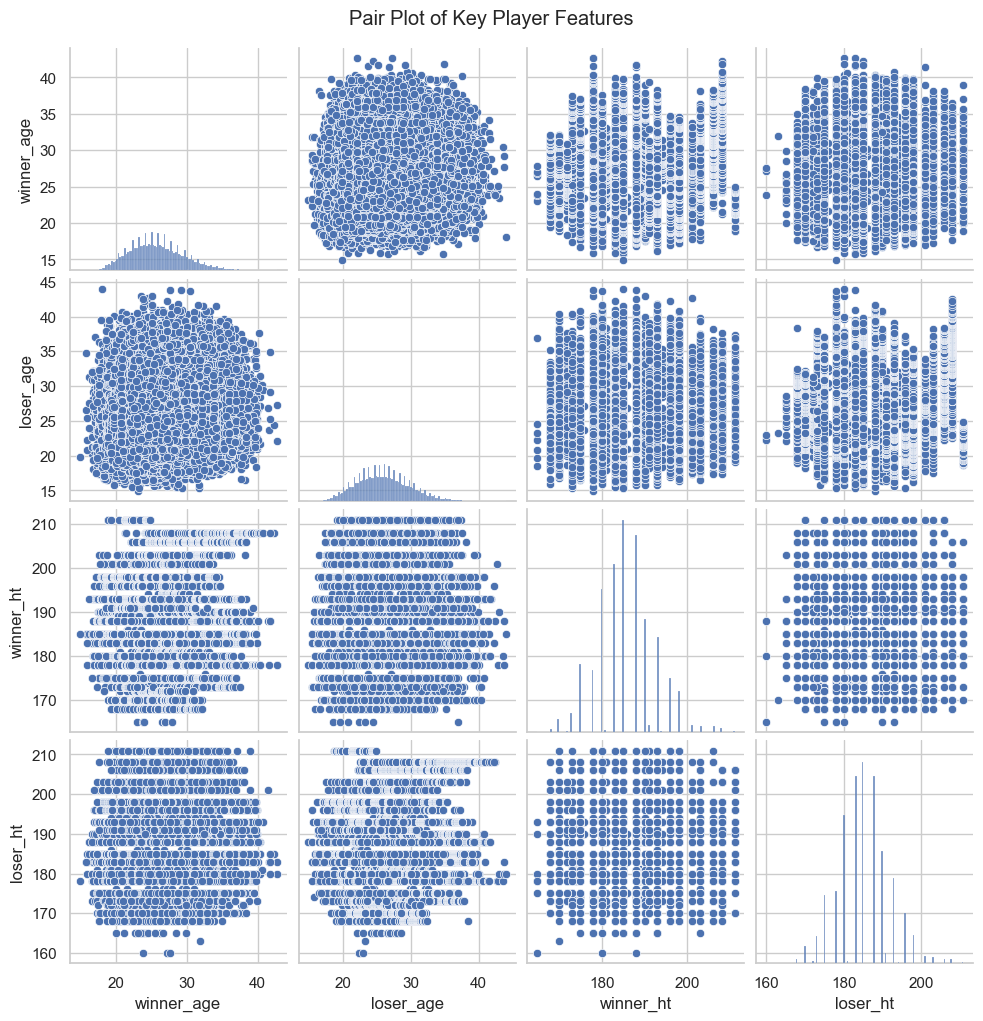

In [ ]:
# Pair plot of selected key numerical features
selected_features = ['winner_age', 'loser_age', 'winner_ht', 'loser_ht']
features_present = [col for col in selected_features if col in initial_clean_df.columns]

if len(features_present) > 1:
    plt.figure(figsize=(12, 10))
    sns.pairplot(initial_clean_df[features_present].dropna())
    plt.suptitle('Pair Plot of Key Player Features', y=1.02)
    plt.show()

In [ ]:
# Summary of findings
print("Summary of Data Exploration:")
print("--------------------------")
print(f"1. Dataset contains {initial_clean_df.shape[0]} rows and {initial_clean_df.shape[1]} columns")

missing_cols = missing_data[missing_data['Missing Values'] > 0]
print(f"2. There are {len(missing_cols)} columns with missing values")

if 'surface' in initial_clean_df.columns:
    surfaces = initial_clean_df['surface'].value_counts()
    dominant_surface = surfaces.index[0]
    print(f"3. Most common playing surface: {dominant_surface} ({surfaces.iloc[0]} matches)")

if 'winner_hand' in initial_clean_df.columns:
    right_handed = (initial_clean_df['winner_hand'] == 'R').sum() + (initial_clean_df['loser_hand'] == 'R').sum()
    left_handed = (initial_clean_df['winner_hand'] == 'L').sum() + (initial_clean_df['loser_hand'] == 'L').sum()
    total_hands = right_handed + left_handed
    print(f"4. Handedness distribution: Right-handed: {right_handed/total_hands:.1%}, Left-handed: {left_handed/total_hands:.1%}")

# Additional insights would be added based on actual data exploration results

Summary of Data Exploration:
--------------------------
1. Dataset contains 110397 rows and 66 columns
2. There are 30 columns with missing values
3. Most common playing surface: Hard (55065 matches)
4. Handedness distribution: Right-handed: 85.7%, Left-handed: 14.3%
